In [1]:
import matplotlib.pyplot as plt

In [37]:
import numpy as np
from pycbc.waveform import get_td_waveform
from pycbc import waveform
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower

f_low = 30
sample_rate = 4096

# Generate the two waveforms to compare
pdhp, pdhc = get_td_waveform(approximant="SEOBNRv4",
                         mass1=5,
                         mass2=5,
                         f_lower=f_low,
                         delta_t=1.0/sample_rate)

hp, hc = get_td_waveform(approximant="TaylorT3",
                         mass1=5,
                         mass2=5,
                         f_lower=f_low,
                         delta_t=1.0/sample_rate)

sp, sc = get_td_waveform(approximant="TaylorT4",
                         mass1=5,
                         mass2=5,
                         f_lower=f_low,
                         delta_t=1.0/sample_rate)

# Resize the waveforms to the same length
tlen = max(len(sp), len(hp), len(pdhp))
sp.resize(tlen)
hp.resize(tlen)
sc.resize(tlen)
hc.resize(tlen)

pdhp.resize(tlen)
pdhc.resize(tlen)

# Generate the aLIGO ZDHP PSD
delta_f = 1.0 / sp.duration
flen = tlen//2 + 1
# psd = aLIGOZeroDetHighPower(flen, delta_f, f_low)
psd = None

# Note: This takes a while the first time as an FFT plan is generated
# subsequent calls are much faster.

fhighs = np.linspace(40, 500, 10)
matches = []
for fhigh in fhighs:
    m, i = match(hp, sp, psd=psd, low_frequency_cutoff=f_low, high_frequency_cutoff=fhigh)
    matches.append(m)


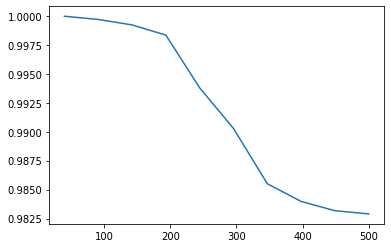

In [38]:
plt.figure()
plt.plot(fhighs, matches)

In [39]:
hp_phase = waveform.frequency_from_polarizations(hp, hc)
sp_phase = waveform.frequency_from_polarizations(sp, sc)
pdhp_phase = waveform.frequency_from_polarizations(pdhp, pdhc)

In [40]:
import phenom

(0.01, 0.05)

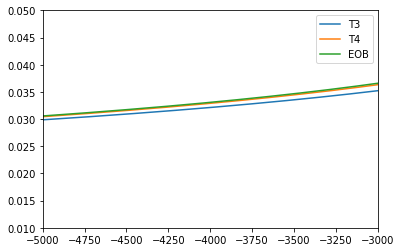

In [47]:
plt.figure()
plt.plot(phenom.StoM(hp_phase.sample_times, 10), phenom.HztoMf(hp_phase, 10)*2*np.pi, label='T3')
plt.plot(phenom.StoM(sp_phase.sample_times, 10), phenom.HztoMf(sp_phase, 10)*2*np.pi, label='T4')
plt.plot(phenom.StoM(pdhp_phase.sample_times, 10), phenom.HztoMf(pdhp_phase, 10)*2*np.pi, label='EOB')
plt.legend()
plt.xlim(-5000,-3000)
# plt.yscale('log')
# plt.ylim(0.01,0.2)
plt.ylim(0.01,0.05)

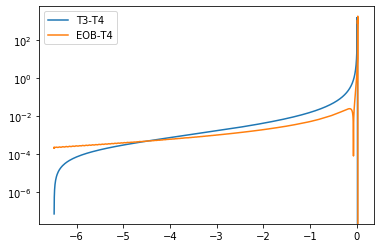

In [51]:
plt.figure()
plt.plot(hp_phase.sample_times, np.abs(hp_phase.numpy()-sp_phase.numpy()), label='T3-T4')
plt.plot(hp_phase.sample_times, np.abs(pdhp_phase.numpy()-sp_phase.numpy()), label='EOB-T4')
plt.legend()
plt.yscale('log')